In [1]:
import pandas as pd

df = pd.read_csv('/content/data.csv')
display(df.head())
display(df.info())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

None

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop irrelevant columns
df = df.drop(['id', 'Unnamed: 32'], axis=1)

# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Encode the target variable
y = y.map({'M': 1, 'B': 0})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

display(X_train_scaled[:5])
display(y_train[:5])

array([[-1.44075296, -0.43531947, -1.36208497, -1.1391179 ,  0.78057331,
         0.71892128,  2.82313451, -0.11914956,  1.09266219,  2.45817261,
        -0.26380039, -0.01605246, -0.47041357, -0.47476088,  0.83836493,
         3.25102691,  8.43893667,  3.39198733,  2.62116574,  2.06120787,
        -1.23286131, -0.47630949, -1.24792009, -0.97396758,  0.72289445,
         1.18673232,  4.67282796,  0.9320124 ,  2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167,  1.85197292,  1.319843  ,
         3.42627493,  2.01311199,  2.66503199,  2.1270036 ,  1.55839569,
         0.80531919, -0.81268678,  0.75195659,  0.87716951, -0.89605315,
         1.18122247,  0.18362761,  0.60059598, -0.31771686,  0.52963649,
         2.17331385,  1.3112795 ,  2.08161691,  2.1374055 ,  0.76192793,
         3.26560084,  1.92862053,  2.6989469 ,  1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, -1.10978518, -1.33264483,
        -0.30735463, -0.36555756, -0.69650228,  1

,diagnosis
68,0
181,1
63,0
248,0
60,0


In [3]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [4]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate precision score
precision = precision_score(y_test, y_pred)

# Calculate recall score
recall = recall_score(y_test, y_pred)

# Calculate ROC-AUC score
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

Confusion Matrix:
[[70  1]
 [ 2 41]]

Precision: 0.9762
Recall: 0.9535
ROC-AUC Score: 0.9974


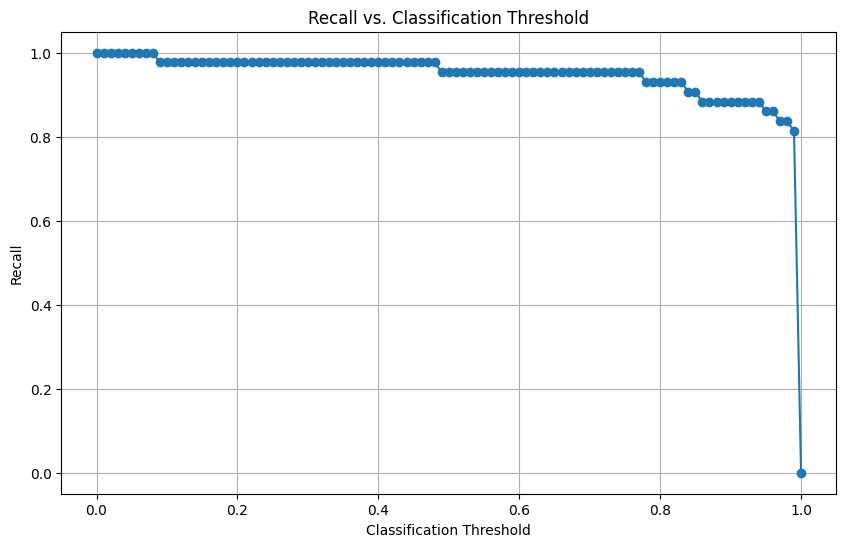

In [6]:
import numpy as np
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

# Calculate predicted probabilities for the test set
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Iterate through a range of potential threshold values and calculate recall
thresholds = np.arange(0.0, 1.01, 0.01)
recall_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    recall = recall_score(y_test, y_pred_threshold)
    recall_scores.append(recall)

# Plot recall vs. threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recall_scores, marker='o', linestyle='-')
plt.title('Recall vs. Classification Threshold')
plt.xlabel('Classification Threshold')
plt.ylabel('Recall')
plt.grid(True)
plt.show()

In [8]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Apply the chosen threshold (0.5) to the predicted probabilities
chosen_threshold = 0.5
y_pred_tuned = (y_pred_proba >= chosen_threshold).astype(int)

# Calculate and print the confusion matrix
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
print("Confusion Matrix with Tuned Threshold (0.5):")
print(conf_matrix_tuned)

# Calculate and print precision and recall
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)

print(f"\nPrecision with Tuned Threshold (0.5): {precision_tuned:.4f}")
print(f"Recall with Tuned Threshold (0.5): {recall_tuned:.4f}")

Confusion Matrix with Tuned Threshold (0.5):
[[70  1]
 [ 2 41]]

Precision with Tuned Threshold (0.5): 0.9762
Recall with Tuned Threshold (0.5): 0.9535


## Summary:

### Data Analysis Key Findings

*   The dataset contains 569 instances and 33 features, including an 'id' column and a fully null column ('Unnamed: 32') which were removed during preprocessing.
*   The target variable 'diagnosis' was successfully encoded into numerical values (M=1, B=0).
*   The features were standardized using `StandardScaler` before model training.
*   The Logistic Regression model trained on the scaled data achieved strong performance metrics on the test set with the default 0.5 threshold:
    *   Confusion Matrix: `[[70 1], [2 41]]` (70 True Negatives, 1 False Positive, 2 False Negatives, 41 True Positives).
    *   Precision: 0.9762
    *   Recall: 0.9535
    *   ROC-AUC Score: 0.9974
*   The sigmoid function was explained as mapping linear model output to a probability between 0 and 1.
*   Threshold tuning was demonstrated by plotting recall against different threshold values, showing that recall remains high up to a threshold of approximately 0.5 and then decreases significantly.
*   Applying the default threshold of 0.5 to the predicted probabilities resulted in the same high precision (0.9762) and recall (0.9535) as the initial model evaluation, confirming its effectiveness for this dataset.

